# [New York City Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)

## Import packages

In [7]:
import numpy as np 
import pandas as pd

## Import data

In [8]:
%%time
train = pd.read_csv("data/train5.csv", nrows=1_000)
test = pd.read_csv("data/test5.csv")

CPU times: user 78.6 ms, sys: 78.1 ms, total: 157 ms
Wall time: 224 ms


In [9]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_long_diff,abs_lat_diff,...,is_year_start,is_year_end,is_leap_year,is_holiday,pickup_place,pickup_admin1,pickup_admin2,dropoff_place,dropoff_admin1,dropoff_admin2
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,...,0,0,0,0,Borough of Queens,New York,Queens County,Borough of Queens,New York,Queens County
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,...,0,0,0,0,New York City,New York,None,Manhattan,New York,New York County
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,...,0,0,0,0,Manhattan,New York,New York County,Weehawken,New Jersey,Hudson County
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,...,0,0,1,0,New York City,New York,None,Weehawken,New Jersey,Hudson County
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,...,0,0,0,0,Manhattan,New York,New York County,Manhattan,New York,New York County


## Convert data type

In [10]:
train['fare_amount'] = train['fare_amount'].astype('float32')

In [11]:
%%time
def convert_dtype(df):
    df['pickup_datetime'] = df['pickup_datetime'].astype('str')
    
    float32_list = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'abs_long_diff', 'abs_lat_diff', 'manhattan_dist', 'sqrt_long_diff', 'sqrt_lat_diff', 'euclidean_dist', 'geodesic_km_dist', 'great_circle_km_dist', 'haversine_dist', 'center_lat', 'center_long']
    for col in float32_list:
        df[col] = df[col].astype('float32')
    
    uint16_list = ['year', 'day_of_year']
    for col in uint16_list:
        df[col] = df[col].astype('uint16')
    
    uint8_list = ['passenger_count', 'month', 'week', 'day', 'hour', 'minute', 'day_of_week', 'quarter', 'part_of_day', 'is_weekday', 'is_weekend', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end', 'is_leap_year', 'is_holiday']
    for col in uint8_list:
        df[col] = df[col].astype('uint8')
    
    category_list = ['pickup_place', 'pickup_admin1', 'pickup_admin2', 'dropoff_place', 'dropoff_admin1', 'dropoff_admin2']
    for col in category_list:
        df[col] = df[col].astype('category')
    
    return df.dtypes

convert_dtype(train)
convert_dtype(test)

CPU times: user 58.3 ms, sys: 6.61 ms, total: 64.9 ms
Wall time: 64.3 ms


key                       object
pickup_datetime           object
pickup_longitude         float32
pickup_latitude          float32
dropoff_longitude        float32
dropoff_latitude         float32
passenger_count            uint8
abs_long_diff            float32
abs_lat_diff             float32
manhattan_dist           float32
sqrt_long_diff           float32
sqrt_lat_diff            float32
euclidean_dist           float32
geodesic_km_dist         float32
great_circle_km_dist     float32
haversine_dist           float32
center_lat               float32
center_long              float32
year                      uint16
month                      uint8
week                       uint8
day                        uint8
hour                       uint8
minute                     uint8
day_of_week                uint8
day_of_year               uint16
quarter                    uint8
part_of_day                uint8
is_weekday                 uint8
is_weekend                 uint8
is_month_s

In [12]:
data = [train, test]
for df in data:
    print(df.shape)

(1000, 45)
(9914, 44)


In [13]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_long_diff,abs_lat_diff,manhattan_dist,sqrt_long_diff,...,is_weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,is_holiday
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,11.469941,-72.126953,39.732525,-72.198685,39.773224,1.592000,0.096561,0.061415,0.157977,5.478460,...,0.725000,0.275000,0.028000,0.04600,0.010000,0.01200,0.002000,0.001000,0.161000,0.02900
std,9.499794,11.555398,6.365537,11.327382,6.240139,1.222715,2.339792,1.287459,3.627159,173.191711,...,0.446738,0.446738,0.165055,0.20959,0.099549,0.10894,0.044699,0.031623,0.367715,0.16789
min,2.500000,-74.438232,0.000000,-74.185997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,6.000000,-73.993042,40.735310,-73.991827,40.732977,1.000000,0.005713,0.006682,0.015520,0.000033,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
50%,8.500000,-73.982136,40.752874,-73.980247,40.753925,1.000000,0.012533,0.013136,0.026915,0.000157,...,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
75%,13.000000,-73.966591,40.766690,-73.962532,40.767706,2.000000,0.025455,0.026164,0.051129,0.000648,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
max,66.300003,0.000000,40.993259,0.000000,40.881878,6.000000,74.005432,40.726685,114.732117,5476.804199,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000


# Categorical Data

https://www.kaggle.com/c/home-credit-default-risk/discussion/58950
<br>https://www.kaggle.com/mlisovyi/beware-of-categorical-features-in-lgbm
<br>https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features

In [15]:
traincv = train.iloc[:100, :]
traincv.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_long_diff,abs_lat_diff,...,is_year_start,is_year_end,is_leap_year,is_holiday,pickup_place,pickup_admin1,pickup_admin2,dropoff_place,dropoff_admin1,dropoff_admin2
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844315,40.721317,-73.841614,40.712276,1,0.002701,0.009041,...,0,0,0,0,Borough of Queens,New York,Queens County,Borough of Queens,New York,Queens County
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1,0.036780,0.070701,...,0,0,0,0,New York City,New York,None,Manhattan,New York,New York County
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2,0.008504,0.010708,...,0,0,0,0,Manhattan,New York,New York County,Weehawken,New Jersey,Hudson County
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758091,1,0.004437,0.024949,...,0,0,1,0,New York City,New York,None,Weehawken,New Jersey,Hudson County
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1,0.011440,0.015754,...,0,0,0,0,Manhattan,New York,New York County,Manhattan,New York,New York County


In [16]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'abs_long_diff', 'abs_lat_diff', 'manhattan_dist',
       'sqrt_long_diff', 'sqrt_lat_diff', 'euclidean_dist', 'geodesic_km_dist',
       'great_circle_km_dist', 'haversine_dist', 'center_lat', 'center_long',
       'year', 'month', 'week', 'day', 'hour', 'minute', 'day_of_week',
       'day_of_year', 'quarter', 'part_of_day', 'is_weekday', 'is_weekend',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'is_leap_year', 'is_holiday',
       'pickup_place', 'pickup_admin1', 'pickup_admin2', 'dropoff_place',
       'dropoff_admin1', 'dropoff_admin2']
target = ['fare_amount']

In [17]:
X_features = train.iloc[:, :][features]
X_target = train.iloc[:, :][target]

X_featurescv = traincv.iloc[:, :][features]
X_targetcv = traincv.iloc[:, :][target]

In [18]:
y_features = test.iloc[:, :][features]

In [19]:
X_features.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_long_diff,abs_lat_diff,manhattan_dist,sqrt_long_diff,sqrt_lat_diff,...,is_year_start,is_year_end,is_leap_year,is_holiday,pickup_place,pickup_admin1,pickup_admin2,dropoff_place,dropoff_admin1,dropoff_admin2
0,-73.844315,40.721317,-73.841614,40.712276,1,0.002701,0.009041,0.011742,0.000007,0.000082,...,0,0,0,0,Borough of Queens,New York,Queens County,Borough of Queens,New York,Queens County
1,-74.016045,40.711304,-73.979271,40.782005,1,0.036780,0.070701,0.107481,0.001353,0.004999,...,0,0,0,0,New York City,New York,None,Manhattan,New York,New York County
2,-73.982735,40.761269,-73.991241,40.750561,2,0.008504,0.010708,0.019212,0.000072,0.000115,...,0,0,0,0,Manhattan,New York,New York County,Weehawken,New Jersey,Hudson County
3,-73.987129,40.733143,-73.991570,40.758091,1,0.004437,0.024949,0.029386,0.000020,0.000622,...,0,0,1,0,New York City,New York,None,Weehawken,New Jersey,Hudson County
4,-73.968094,40.768009,-73.956657,40.783764,1,0.011440,0.015754,0.027194,0.000131,0.000248,...,0,0,0,0,Manhattan,New York,New York County,Manhattan,New York,New York County


In [20]:
X_featurescv.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_long_diff,abs_lat_diff,manhattan_dist,sqrt_long_diff,sqrt_lat_diff,...,is_year_start,is_year_end,is_leap_year,is_holiday,pickup_place,pickup_admin1,pickup_admin2,dropoff_place,dropoff_admin1,dropoff_admin2
0,-73.844315,40.721317,-73.841614,40.712276,1,0.002701,0.009041,0.011742,0.000007,0.000082,...,0,0,0,0,Borough of Queens,New York,Queens County,Borough of Queens,New York,Queens County
1,-74.016045,40.711304,-73.979271,40.782005,1,0.036780,0.070701,0.107481,0.001353,0.004999,...,0,0,0,0,New York City,New York,None,Manhattan,New York,New York County
2,-73.982735,40.761269,-73.991241,40.750561,2,0.008504,0.010708,0.019212,0.000072,0.000115,...,0,0,0,0,Manhattan,New York,New York County,Weehawken,New Jersey,Hudson County
3,-73.987129,40.733143,-73.991570,40.758091,1,0.004437,0.024949,0.029386,0.000020,0.000622,...,0,0,1,0,New York City,New York,None,Weehawken,New Jersey,Hudson County
4,-73.968094,40.768009,-73.956657,40.783764,1,0.011440,0.015754,0.027194,0.000131,0.000248,...,0,0,0,0,Manhattan,New York,New York County,Manhattan,New York,New York County


In [21]:
y_features.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_long_diff,abs_lat_diff,manhattan_dist,sqrt_long_diff,sqrt_lat_diff,...,is_year_start,is_year_end,is_leap_year,is_holiday,pickup_place,pickup_admin1,pickup_admin2,dropoff_place,dropoff_admin1,dropoff_admin2
0,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970,0.028080,0.000066,0.000399,...,0,0,0,0,Manhattan,New York,New York County,Long Island City,New York,Queens County
1,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817,0.031841,0.000145,0.000393,...,0,0,0,0,New York City,New York,None,New York City,New York,None
2,-73.982521,40.751259,-73.979652,40.746140,1,0.002870,0.005121,0.007991,0.000008,0.000026,...,0,0,0,0,Long Island City,New York,Queens County,Long Island City,New York,Queens County
3,-73.981163,40.767807,-73.990448,40.751637,1,0.009288,0.016172,0.025460,0.000086,0.000262,...,0,0,1,0,Manhattan,New York,New York County,Weehawken,New Jersey,Hudson County
4,-73.966049,40.789776,-73.988564,40.744427,1,0.022519,0.045348,0.067867,0.000507,0.002056,...,0,0,1,0,Manhattan,New York,New York County,New York City,New York,None


# One-hot encoding

In [ ]:
#X_features_encoded = pd.get_dummies(X_features, columns=['pickup_place', 'dropoff_place'])
#y_features_encoded = pd.get_dummies(y_features, columns=['pickup_place', 'dropoff_place'])

In [ ]:
#X_set_features = set(X_features_encoded.columns)
#y_set_features = set(y_features_encoded.columns)
#print(len(X_set_features))
#print(len(y_set_features))
#X_set_features == y_set_features

In [ ]:
#y_reindexed = y_features_encoded.reindex(columns = X_features_encoded.columns, fill_value = 0)

In [ ]:
#X_features_encoded.columns == y_reindexed.columns

In [ ]:
#X_features_encoded.head()

In [ ]:
#y_reindexed.head()

# lgb Model
## GridSearchCV

https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823
<br>https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features

In [22]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_features, X_target, test_size=0.3, random_state=0)
train_Xcv, test_Xcv, train_ycv, test_ycv = train_test_split(X_featurescv, X_targetcv, test_size=0.3, random_state=0)

In [24]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [25]:
#dataset
lgb_train = lgb.Dataset(train_X, train_y,
#                        categorical_feature=features, 
                        silent=True, 
                        free_raw_data=False)
lgb_eval = lgb.Dataset(test_X, test_y, reference=lgb_train)

#dataset
lgb_traincv = lgb.Dataset(train_Xcv, train_ycv,
#                        categorical_feature=features, 
                        silent=True, 
                        free_raw_data=False)
lgb_evalcv = lgb.Dataset(test_Xcv, test_ycv, reference=lgb_train)

In [26]:
def lgb_gridmodel(train_X, test_X, train_y, test_y):
    import lightgbm as lgb
    from sklearn.model_selection import GridSearchCV
    #dataset
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_eval = lgb.Dataset(test_X, test_y, reference=lgb_train)
    #基本配備，初始參數boosting_type, objective, metric
    global params
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
    }
    #cv
    min_merror = float('Inf')
    global best_params
    best_params = {}
    #num_leaves, max_depth
    for num_leaves in range(20,200,5):
        for max_depth in range(3,8,1):
            params['num_leaves'] = num_leaves
            params['max_depth'] = max_depth
            cv_results = lgb.cv(
                params,
                lgb_train,
                seed=2019,
                stratified=False, 
                nfold=5,
                metrics=['rmse'],
                early_stopping_rounds=10,
                verbose_eval=50
            )
        
            mean_merror = pd.Series(cv_results['rmse-mean']).min()
            boost_rounds = pd.Series(cv_results['rmse-mean']).argmin()
            
            if mean_merror < min_merror:
                min_merror = mean_merror
                best_params['num_leaves'] = num_leaves
                best_params['max_depth'] = max_depth
    params['num_leaves'] = best_params['num_leaves']
    params['max_depth'] = best_params['max_depth']
    
    #max_bin, min_child_samples, min_child_weight(沒調)
    for max_bin in range(5,255,5):
        for min_data_in_leaf in range(10,200,5):
            for min_child_weight in [0.001, 0.002, 0.003, 0.004, 0.005]:
                params['max_bin'] = max_bin
                params['min_data_in_leaf'] = min_data_in_leaf
                params['min_child_weight'] = min_child_weight
                cv_results = lgb.cv(
                    params,
                    lgb_train,
                    seed=42,
                    stratified=False,
                    nfold=5,
                    early_stopping_rounds=3,
                    verbose_eval=50
                )
                mean_merror = pd.Series(cv_results['rmse-mean']).min()
                boost_rounds = pd.Series(cv_results['rmse-mean']).argmin()

                if mean_merror < min_merror:
                    min_merror = mean_merror
                    best_params['max_bin'] = max_bin
                    best_params['min_data_in_leaf'] = min_data_in_leaf
                    best_params['min_child_weight'] = min_child_weight
    params['max_bin'] = best_params['max_bin']
    params['min_data_in_leaf'] = best_params['min_data_in_leaf']
    params['min_child_weight'] = best_params['min_child_weight']
    
    #feature_fraction, bagging_fraction, bagging_freq
    for feature_fraction in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
        for bagging_fraction in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
            for bagging_freq in range(0,50,5):
                params['feature_fraction'] = feature_fraction
                params['bagging_fraction'] = bagging_fraction
                params['bagging_freq'] = bagging_freq
                cv_results = lgb.cv(
                    params,
                    lgb_train,
                    seed=42,
                    stratified=False,
                    nfold=5,
                    metrics=['rmse'],
                    early_stopping_rounds=3,
                    verbose_eval=50
                )
                mean_merror = pd.Series(cv_results['rmse-mean']).min()
                boost_rounds = pd.Series(cv_results['rmse-mean']).argmin()

                if mean_merror < min_merror:
                    min_merror = mean_merror
                    best_params['feature_fraction'] = feature_fraction
                    best_params['bagging_fraction'] = bagging_fraction
                    best_params['bagging_freq'] = bagging_freq
    params['feature_fraction'] = best_params['feature_fraction']
    params['bagging_fraction'] = best_params['bagging_fraction']
    params['bagging_freq'] = best_params['bagging_freq']
    
    #lambda_l1, lambda_l2, min_split_gain
    for lambda_l1 in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
        for lambda_l2 in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
            for min_split_gain in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
                params['lambda_l1'] = lambda_l1
                params['lambda_l2'] = lambda_l2
                params['min_split_gain'] = min_split_gain
                cv_results = lgb.cv(
                    params,
                    lgb_train,
                    seed=42,
                    stratified=False,
                    nfold=5,
                    metrics=['rmse'],
                    early_stopping_rounds=3,
                    verbose_eval=50
                )
                mean_merror = pd.Series(cv_results['rmse-mean']).min()
                boost_rounds = pd.Series(cv_results['rmse-mean']).argmin()
            
                if mean_merror < min_merror:
                    min_merror = mean_merror
                    best_params['lambda_l1'] = lambda_l1
                    best_params['lambda_l2'] = lambda_l2
                    best_params['min_split_gain'] = min_split_gain
    params['lambda_l1'] = best_params['lambda_l1']
    params['lambda_l2'] = best_params['lambda_l2']
    params['min_split_gain'] = best_params['min_split_gain']
    return best_params

In [27]:
%%time
lgb_gridmodel(train_Xcv, test_Xcv, train_ycv, test_ycv)

/Users/JackChang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
/Users/JackChang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg'

[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg'

/Users/JackChang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502
[50]	cv_agg's rmse: 5.17956 + 2.67502


KeyError: 'feature_fraction'

In [28]:
best_params

{'num_leaves': 20,
 'max_depth': 3,
 'max_bin': 5,
 'min_data_in_leaf': 15,
 'min_child_weight': 0.001}

In [29]:
params['learning_rate']=0.4
params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'num_leaves': 20,
 'max_depth': 3,
 'max_bin': 5,
 'min_data_in_leaf': 15,
 'min_child_weight': 0.001,
 'feature_fraction': 1.0,
 'bagging_fraction': 1.0,
 'bagging_freq': 45,
 'learning_rate': 0.4}

In [30]:
gbm = lgb.train(
    params,                     
    lgb_train,                  
    valid_sets=lgb_eval,       
    num_boost_round=300,    
    early_stopping_rounds=50
)

[1]	valid_0's rmse: 6.21191
Training until validation scores don't improve for 50 rounds
[2]	valid_0's rmse: 5.35266
[3]	valid_0's rmse: 4.75386
[4]	valid_0's rmse: 4.52033
[5]	valid_0's rmse: 4.51798
[6]	valid_0's rmse: 4.42718
[7]	valid_0's rmse: 4.32143
[8]	valid_0's rmse: 4.34267
[9]	valid_0's rmse: 4.34254
[10]	valid_0's rmse: 4.3206
[11]	valid_0's rmse: 4.32287
[12]	valid_0's rmse: 4.35959
[13]	valid_0's rmse: 4.33299
[14]	valid_0's rmse: 4.32695
[15]	valid_0's rmse: 4.26639
[16]	valid_0's rmse: 4.26865
[17]	valid_0's rmse: 4.28655
[18]	valid_0's rmse: 4.32277
[19]	valid_0's rmse: 4.32941
[20]	valid_0's rmse: 4.34398
[21]	valid_0's rmse: 4.28373
[22]	valid_0's rmse: 4.28914
[23]	valid_0's rmse: 4.2645
[24]	valid_0's rmse: 4.27805
[25]	valid_0's rmse: 4.24957
[26]	valid_0's rmse: 4.2169
[27]	valid_0's rmse: 4.20346
[28]	valid_0's rmse: 4.22904
[29]	valid_0's rmse: 4.22932
[30]	valid_0's rmse: 4.22683
[31]	valid_0's rmse: 4.23127
[32]	valid_0's rmse: 4.26498
[33]	valid_0's rmse: 4.

In [31]:
y_pred_lgb = gbm.predict(y_features, num_iteration = gbm.best_iteration)

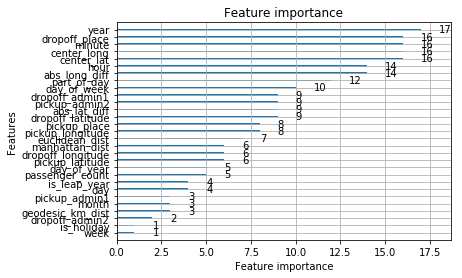

In [32]:
#feature importance
%matplotlib inline
import matplotlib.pyplot as plt

ax = lgb.plot_importance(gbm)

In [34]:
submission = pd.DataFrame()
submission['key'] = test.key
submission['fare_amount'] = y_pred_lgb
submission.to_csv('data/submission/y_pred_lgb.csv', index = False)

In [36]:
ss = pd.read_csv('data/sample_submission.csv')
#ss = pd.read_csv('sample_submission.csv')
ss.loc[:, 'fare_amount'] = y_pred_lgb

ss.to_csv('data/submission/y_pred_lgb.csv', index=False)

# top

In [37]:
top_params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.4,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'verbose':0
    }

In [38]:
gbmtop = lgb.train(
    top_params,                     
    lgb_train,                  
    valid_sets=lgb_eval,       
    num_boost_round=300,    
    early_stopping_rounds=50
)

[1]	valid_0's rmse: 6.36982
Training until validation scores don't improve for 50 rounds
[2]	valid_0's rmse: 5.47512
[3]	valid_0's rmse: 4.78655
[4]	valid_0's rmse: 4.54174
[5]	valid_0's rmse: 4.49662
[6]	valid_0's rmse: 4.49673
[7]	valid_0's rmse: 4.5348
[8]	valid_0's rmse: 4.56656
[9]	valid_0's rmse: 4.44266
[10]	valid_0's rmse: 4.50279
[11]	valid_0's rmse: 4.46121
[12]	valid_0's rmse: 4.47541
[13]	valid_0's rmse: 4.46355
[14]	valid_0's rmse: 4.52701
[15]	valid_0's rmse: 4.48396
[16]	valid_0's rmse: 4.54448
[17]	valid_0's rmse: 4.66857
[18]	valid_0's rmse: 4.6918
[19]	valid_0's rmse: 4.60172
[20]	valid_0's rmse: 4.68708
[21]	valid_0's rmse: 4.74284
[22]	valid_0's rmse: 4.73694
[23]	valid_0's rmse: 4.73211
[24]	valid_0's rmse: 4.68941
[25]	valid_0's rmse: 4.67485
[26]	valid_0's rmse: 4.67379
[27]	valid_0's rmse: 4.67851
[28]	valid_0's rmse: 4.69676
[29]	valid_0's rmse: 4.72574
[30]	valid_0's rmse: 4.7255
[31]	valid_0's rmse: 4.75207
[32]	valid_0's rmse: 4.76424
[33]	valid_0's rmse: 4.

In [39]:
y_pred_lgbtop = gbmtop.predict(y_features, num_iteration = gbm.best_iteration)

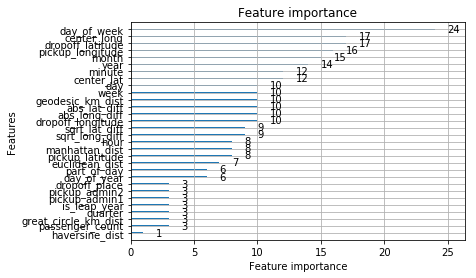

In [40]:
#feature importance
%matplotlib inline
import matplotlib.pyplot as plt

ax = lgb.plot_importance(gbmtop)

In [41]:
submission = pd.DataFrame()
submission['key'] = test.key
submission['fare_amount'] = y_pred_lgbtop
submission.to_csv('data/submission/y_pred_lgb2.csv', index = False)

In [42]:
ss = pd.read_csv('data/sample_submission.csv')
#ss = pd.read_csv('sample_submission.csv')
ss.loc[:, 'fare_amount'] = y_pred_lgbtop

ss.to_csv('data/submission/y_pred_lgb2.csv', index=False)